In [6]:
!pip install tensorflow


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Importing necessary libraries
#import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

AttributeError: partially initialized module 'numpy' has no attribute 'array' (most likely due to a circular import)

In [5]:
tf.__version__

NameError: name 'tf' is not defined

In [ ]:
#Load the Excel dataset
dataset = pd.read_excel('C:/Users/91888/OneDrive/Documents/american express user exit.xlsx')

In [ ]:
# EDA: Display the first few rows of the dataset
print("First few rows of the dataset:")
print(dataset.head())

First few rows of the dataset:
   Credit Score  Geography  Gender  Age  Customer Since  Current Account  \
0           553      Delhi  Female   45               4            0.000   
1           447  Bengaluru    Male   31               7            0.000   
2           501      Delhi  Female   32               2            0.000   
3           428      Delhi    Male   51               3            0.000   
4           492      Delhi  Female   57               6      1912681.501   

   Num of products  UPI Enabled  Estimated Yearly Income  Closed  
0                4            1                   274150       0  
1                4            1                   519360       0  
2                4            1                   545501       0  
3                4            1                    86868       0  
4                2            1                   518680       0  


In [ ]:
# EDA: Display the column names
print("Column names in the dataset:")
print(dataset.columns)

Column names in the dataset:
Index(['Credit Score', 'Geography', 'Gender', 'Age', 'Customer Since',
       'Current Account', 'Num of products', 'UPI Enabled',
       'Estimated Yearly Income', 'Closed'],
      dtype='object')


In [ ]:
# EDA: Check for missing values
print("Missing values in each column:")
print(dataset.isnull().sum())

Missing values in each column:
Credit Score               0
Geography                  0
Gender                     0
Age                        0
Customer Since             0
Current Account            0
Num of products            0
UPI Enabled                0
Estimated Yearly Income    0
Closed                     0
dtype: int64


In [ ]:
 #EDA: Basic statistics
print("Basic statistics of the dataset:")
print(dataset.describe())


Basic statistics of the dataset:
       Credit Score          Age  Customer Since  Current Account  \
count   9927.000000  9927.000000     9927.000000     9.927000e+03   
mean     529.465599    45.666163        4.417447     9.839860e+05   
std       78.610089    16.100517        2.392987     8.407988e+05   
min      285.000000    17.000000        0.000000     0.000000e+00   
25%      475.000000    35.000000        3.000000     0.000000e+00   
50%      531.000000    42.000000        4.000000     1.159221e+06   
75%      584.000000    53.000000        7.000000     1.655112e+06   
max      692.000000   137.000000        8.000000     3.985304e+06   

       Num of products  UPI Enabled  Estimated Yearly Income       Closed  
count      9927.000000  9927.000000              9927.000000  9927.000000  
mean          3.029314     0.704946            274356.781505     0.204291  
std           1.081528     0.456090            157578.700489     0.403203  
min           2.000000     0.000000      

In [ ]:
print(dataset.columns)


Index(['Credit Score', 'Geography', 'Gender', 'Age', 'Customer Since',
       'Current Account', 'Num of products', 'UPI Enabled',
       'Estimated Yearly Income', 'Closed'],
      dtype='object')


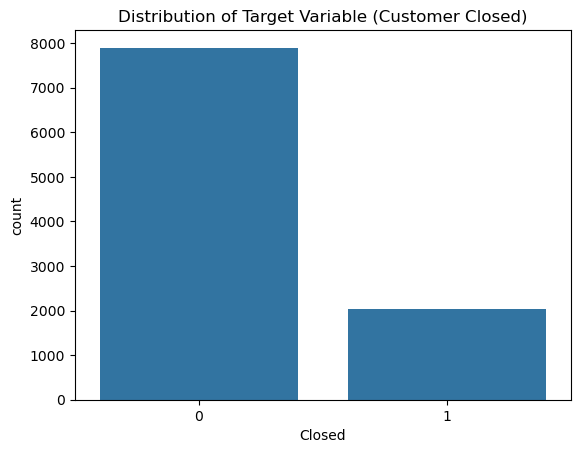

In [ ]:
 #EDA: Visualizing the distribution of the target variable ('closed')
sns.countplot(x='Closed', data=dataset)  # The target variable is 'closed'
plt.title('Distribution of Target Variable (Customer Closed)')
plt.show()

Numeric columns in the dataset: ['Credit Score', 'Age', 'Customer Since', 'Current Account', 'Num of products', 'UPI Enabled', 'Estimated Yearly Income', 'Closed']


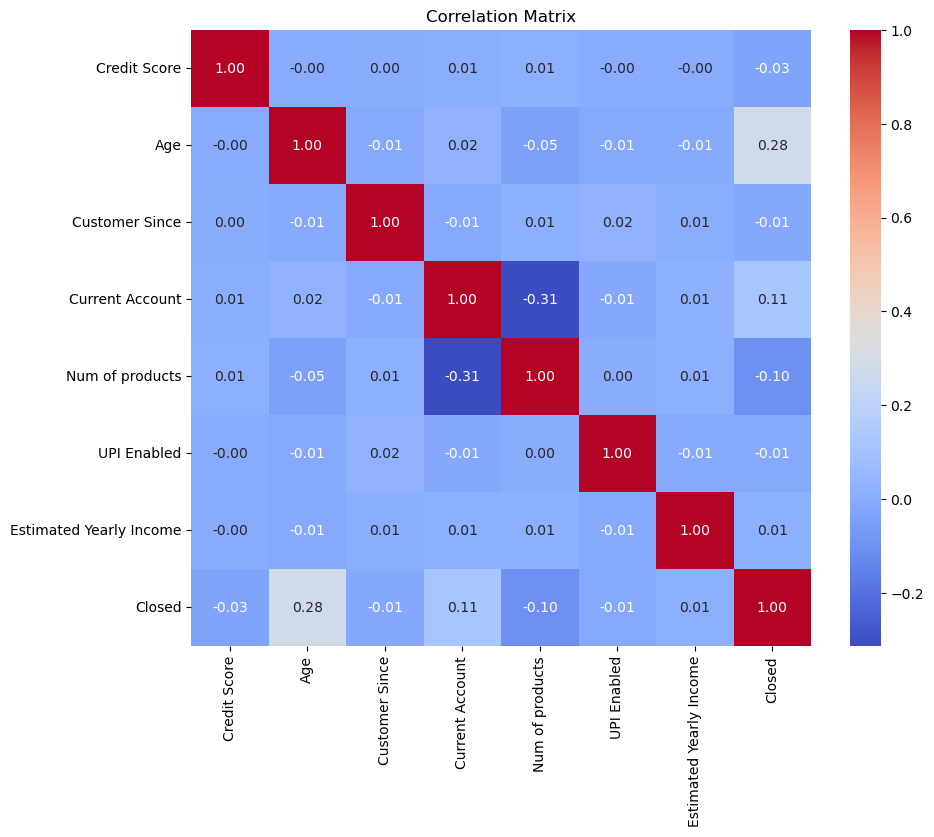

In [ ]:
# EDA: Correlation matrix

# Identify numeric columns
numeric_columns = dataset.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns in the dataset:", numeric_columns)

# Calculate the correlation matrix using only numeric columns
correlation_matrix = dataset[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[553 'Delhi' 'Female' ... 4 1 274150]
 [447 'Bengaluru' 'Male' ... 4 1 519360]
 [501 'Delhi' 'Female' ... 4 1 545501]
 ...
 [627 'Mumbai' 'Female' ... 4 0 494067]
 [600 'Bengaluru' 'Female' ... 2 1 109375]
 [553 'Delhi' 'Male' ... 4 1 180031]]


In [ ]:
#Encoding Categorical Data Label-Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
X[:,2]=label_encoder.fit_transform(X[:,2])

In [ ]:
print(X)

[[553 'Delhi' 0 ... 4 1 274150]
 [447 'Bengaluru' 1 ... 4 1 519360]
 [501 'Delhi' 0 ... 4 1 545501]
 ...
 [627 'Mumbai' 0 ... 4 0 494067]
 [600 'Bengaluru' 0 ... 2 1 109375]
 [553 'Delhi' 1 ... 4 1 180031]]


In [ ]:
#Encoding using Onehot Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[0.0 1.0 0.0 ... 4 1 274150]
 [1.0 0.0 0.0 ... 4 1 519360]
 [0.0 1.0 0.0 ... 4 1 545501]
 ...
 [0.0 0.0 1.0 ... 4 0 494067]
 [1.0 0.0 0.0 ... 2 1 109375]
 [0.0 1.0 0.0 ... 4 1 180031]]


In [ ]:
#Handling Missing Values
import numpy as np
X_train = np.nan_to_num(X_train)  # Replace NaN with 0
X_test = np.nan_to_num(X_test)


In [ ]:
#Splitting dataset into Training &Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# ANN Initialization
ann = tf.keras.models.Sequential() 




In [ ]:
#adding input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=5,activation='relu'))

In [ ]:
#adding second hidden layer
ann.add(tf.keras.layers.Dense(units=5,activation='relu'))

In [ ]:
# adding output layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history=ann.fit(X_train, y_train, batch_size = 32, epochs = 120)

Epoch 1/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4445 - loss: 0.8488
Epoch 2/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7690 - loss: 0.5228
Epoch 3/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7934 - loss: 0.4853
Epoch 4/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7989 - loss: 0.4549
Epoch 5/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8010 - loss: 0.4403
Epoch 6/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8093 - loss: 0.4222
Epoch 7/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8152 - loss: 0.4135
Epoch 8/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8151 - loss: 0.4147
Epoch 9/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8219 - loss: 0.4077
Epoch 10/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8275 - loss: 0.4015
Epoch 11/120
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8287 - loss: 0.3940
Epoch 12/120
249/249 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
print(ann.predict(sc.transform([[0.0, 1.0, 0.0, 501, 0, 32, 2, 0.0, 4, 1, 545501]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
[[False]]


In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1482   83]
 [ 216  205]]


0.8494461228600202

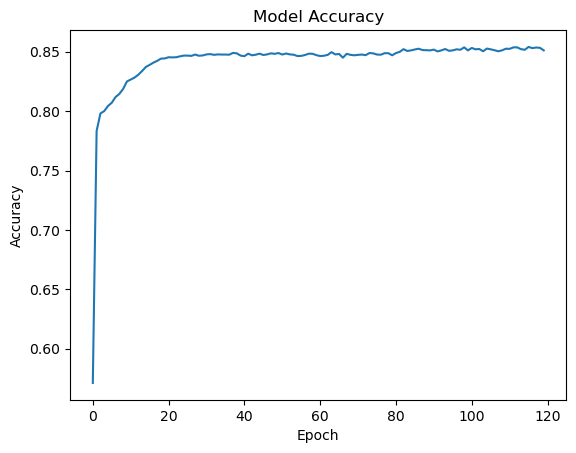

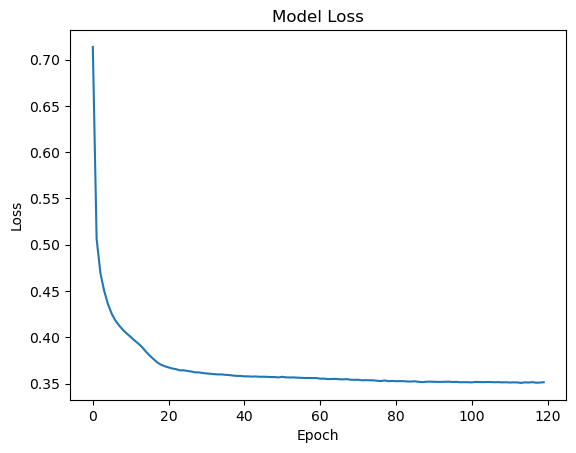

In [ ]:
# Plotting training history
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()